## Read EigenVec and Funtion $\lambda$

This code read the Eigenvectors in binary and plot the proyection of the eigenvector in the plane YX

In [1]:
"""
_________________
   LIBRARIES
"""

from struct import *
import numpy as np
import sys
import os
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
"""
======================
Lectura de Datos 

    ---> EigenVectores
======================
"""

## Dirección archivos ##
#Direction_eigenvector='../Bolshoi/Eigenvec_s1_1'
#Direction_eigenvalor='../Bolshoi/Eigen_s1_1'

folder = '../Bolshoi/'
file = 'Eigenvec_s1_1'

print("Reading eigenvector file")
f = open("%s%s"%(folder,file), "rb")
#f = open("../Bolshoi/Eigenvec_s1_1", "rb")
dumb = f.read(38)

dumb = f.read(4)
n_x = f.read(4)
n_y = f.read(4)
n_z = f.read(4)
nodes = f.read(4)
x0 = f.read(4)
y0 = f.read(4)
z0 = f.read(4)
dx = f.read(4)
dy = f.read(4)
dz = f.read(4)
dumb = f.read(4)

n_x = (unpack('i', n_x))[0]
n_y = (unpack('i', n_y))[0]
n_z = (unpack('i', n_z))[0]
nodes = (unpack('i', nodes))[0]
dx = (unpack('f', dx))[0]
dy = (unpack('f', dy))[0]
dz = (unpack('f', dz))[0]
x0 = (unpack('f', x0))[0]
y0 = (unpack('f', y0))[0]
z0 = (unpack('f', z0))[0]
print(n_x, n_y, n_z, nodes, dx, dy, dz)

total_nodes = 3 * n_x * n_y *n_z
dumb = f.read(4)
array_data = f.read(total_nodes*4)
dumb = f.read(4)
format_s = str(total_nodes)+'f'
array_data = unpack(format_s, array_data)
f.close()
array_data  = np.array(array_data)
new_array_data = np.reshape(array_data, (3,n_x,n_y,n_z), order='F')
print("--------------------\n")


## ¿a que hace referencia el dx,dy y dz ?



Reading eigenvector file
256 256 256 16777216 976.5625 976.5625 976.5625
--------------------



In [3]:
"""
=================================
Asignacion datos y generar Grid 
=================================
"""

X=[]
Y=[]
Z=[]


# Z PROYECTADO SOBRE PLANO X,Y

s = 2   #--> slice en z que pretende tomar

for i in range(n_x):
    for j in range(n_x):
        X.append(new_array_data[0,i,j,s])
        Y.append(new_array_data[1,i,j,s])
        Z.append(new_array_data[2,i,j,s])
    
print(len(X),len(Y))

# COMBIERTE ESTRUCTURA A UNA MATRIZ
X=np.reshape(X,(256,256))
Y=np.reshape(Y,(256,256))
Z=np.reshape(Z,(256,256))

# GENERA GRID
posx=np.arange(0,256,1)
posy=np.arange(0,256,1)
posz=np.arange(0,256,1)

Px,Py=np.meshgrid(posx,posy)

print("estructure ready")


65536 65536
estructure ready


<IPython.core.display.Javascript object>


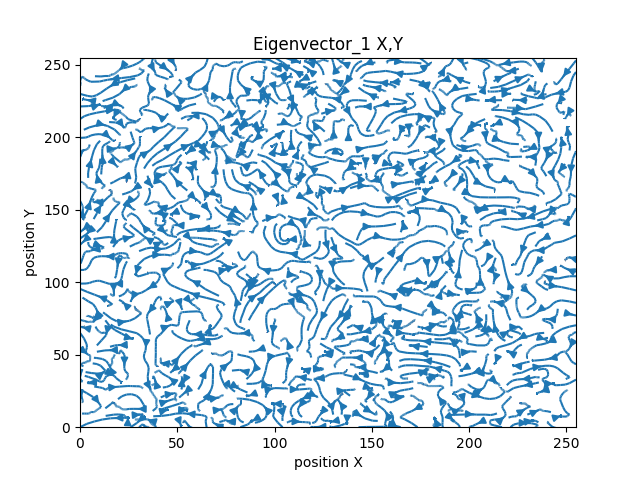

In [6]:
"""
=================================
Graficas
=================================
"""

plt.figure()
plt.streamplot(Px,Py,X,Y,density=2)
plt.title("Eigenvector_1 X,Y")
plt.xlabel("position X")
plt.ylabel("position Y")




In [5]:
"""
========================
Funcion para obtener el 
EigenValor y EigenVector
========================
"""







'\n========================\nFuncion para obtener el \nEigenValor y EigenVector\n========================\n'